In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import pydotplus
import matplotlib.pyplot as plt
from tkinter import *
import numpy as np
import pickle
import pandas as pd
import os
from sklearn import tree

In [4]:
l1=['back_pain','constipation','abdominal_pain','diarrhoea','mild_fever','yellow_urine',
    'yellowing_of_eyes','acute_liver_failure','fluid_overload','swelling_of_stomach',
    'swelled_lymph_nodes','malaise','blurred_and_distorted_vision','phlegm','throat_irritation',
    'redness_of_eyes','sinus_pressure','runny_nose','congestion','chest_pain','weakness_in_limbs',
    'fast_heart_rate','pain_during_bowel_movements','pain_in_anal_region','bloody_stool',
    'irritation_in_anus','neck_pain','dizziness','cramps','bruising','obesity','swollen_legs',
    'swollen_blood_vessels','puffy_face_and_eyes','enlarged_thyroid','brittle_nails',
    'swollen_extremeties','excessive_hunger','extra_marital_contacts','drying_and_tingling_lips',
    'slurred_speech','knee_pain','hip_joint_pain','muscle_weakness','stiff_neck','swelling_joints',
    'movement_stiffness','spinning_movements','loss_of_balance','unsteadiness',
    'weakness_of_one_body_side','loss_of_smell','bladder_discomfort','foul_smell_of urine',
    'continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)',
    'depression','irritability','muscle_pain','altered_sensorium','red_spots_over_body','belly_pain',
    'abnormal_menstruation','dischromic _patches','watering_from_eyes','increased_appetite','polyuria','family_history','mucoid_sputum',
    'rusty_sputum','lack_of_concentration','visual_disturbances','receiving_blood_transfusion',
    'receiving_unsterile_injections','coma','stomach_bleeding','distention_of_abdomen',
    'history_of_alcohol_consumption','fluid_overload','blood_in_sputum','prominent_veins_on_calf',
    'palpitations','painful_walking','pus_filled_pimples','blackheads','scurring','skin_peeling',
    'silver_like_dusting','small_dents_in_nails','inflammatory_nails','blister','red_sore_around_nose',
    'yellow_crust_ooze']

In [5]:
disease=['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo']

#disease = [df['prognosis'].unique()]
#print(disease)

In [6]:
l2=[]
for i in range(0,len(l1)):
    l2.append(0)
print(l2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
df=pd.read_csv("Training.csv")
DF= pd.read_csv('Training.csv', index_col='prognosis')

df.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}},inplace=True)
#df.head()
DF.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
prognosis,,,,,,,,,,,,,,,,,,,,,
Fungal infection,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fungal infection,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fungal infection,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fungal infection,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fungal infection,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
def plotPerColumnDistribution(df1, nGraphShown, nGraphPerRow):
    nunique = df1.nunique()
    df1 = df1[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df1.shape
    columnNames = list(df1)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [9]:
# Scatter and density plots
def plotScatterMatrix(df1, plotSize, textSize):
    df1 = df1.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df1 = df1.dropna('columns')
    df1 = df1[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df1 = df1[columnNames]
    ax = pd.plotting.scatter_matrix(df1, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df1.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

<ipython-input-8-52d45fc4c248>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


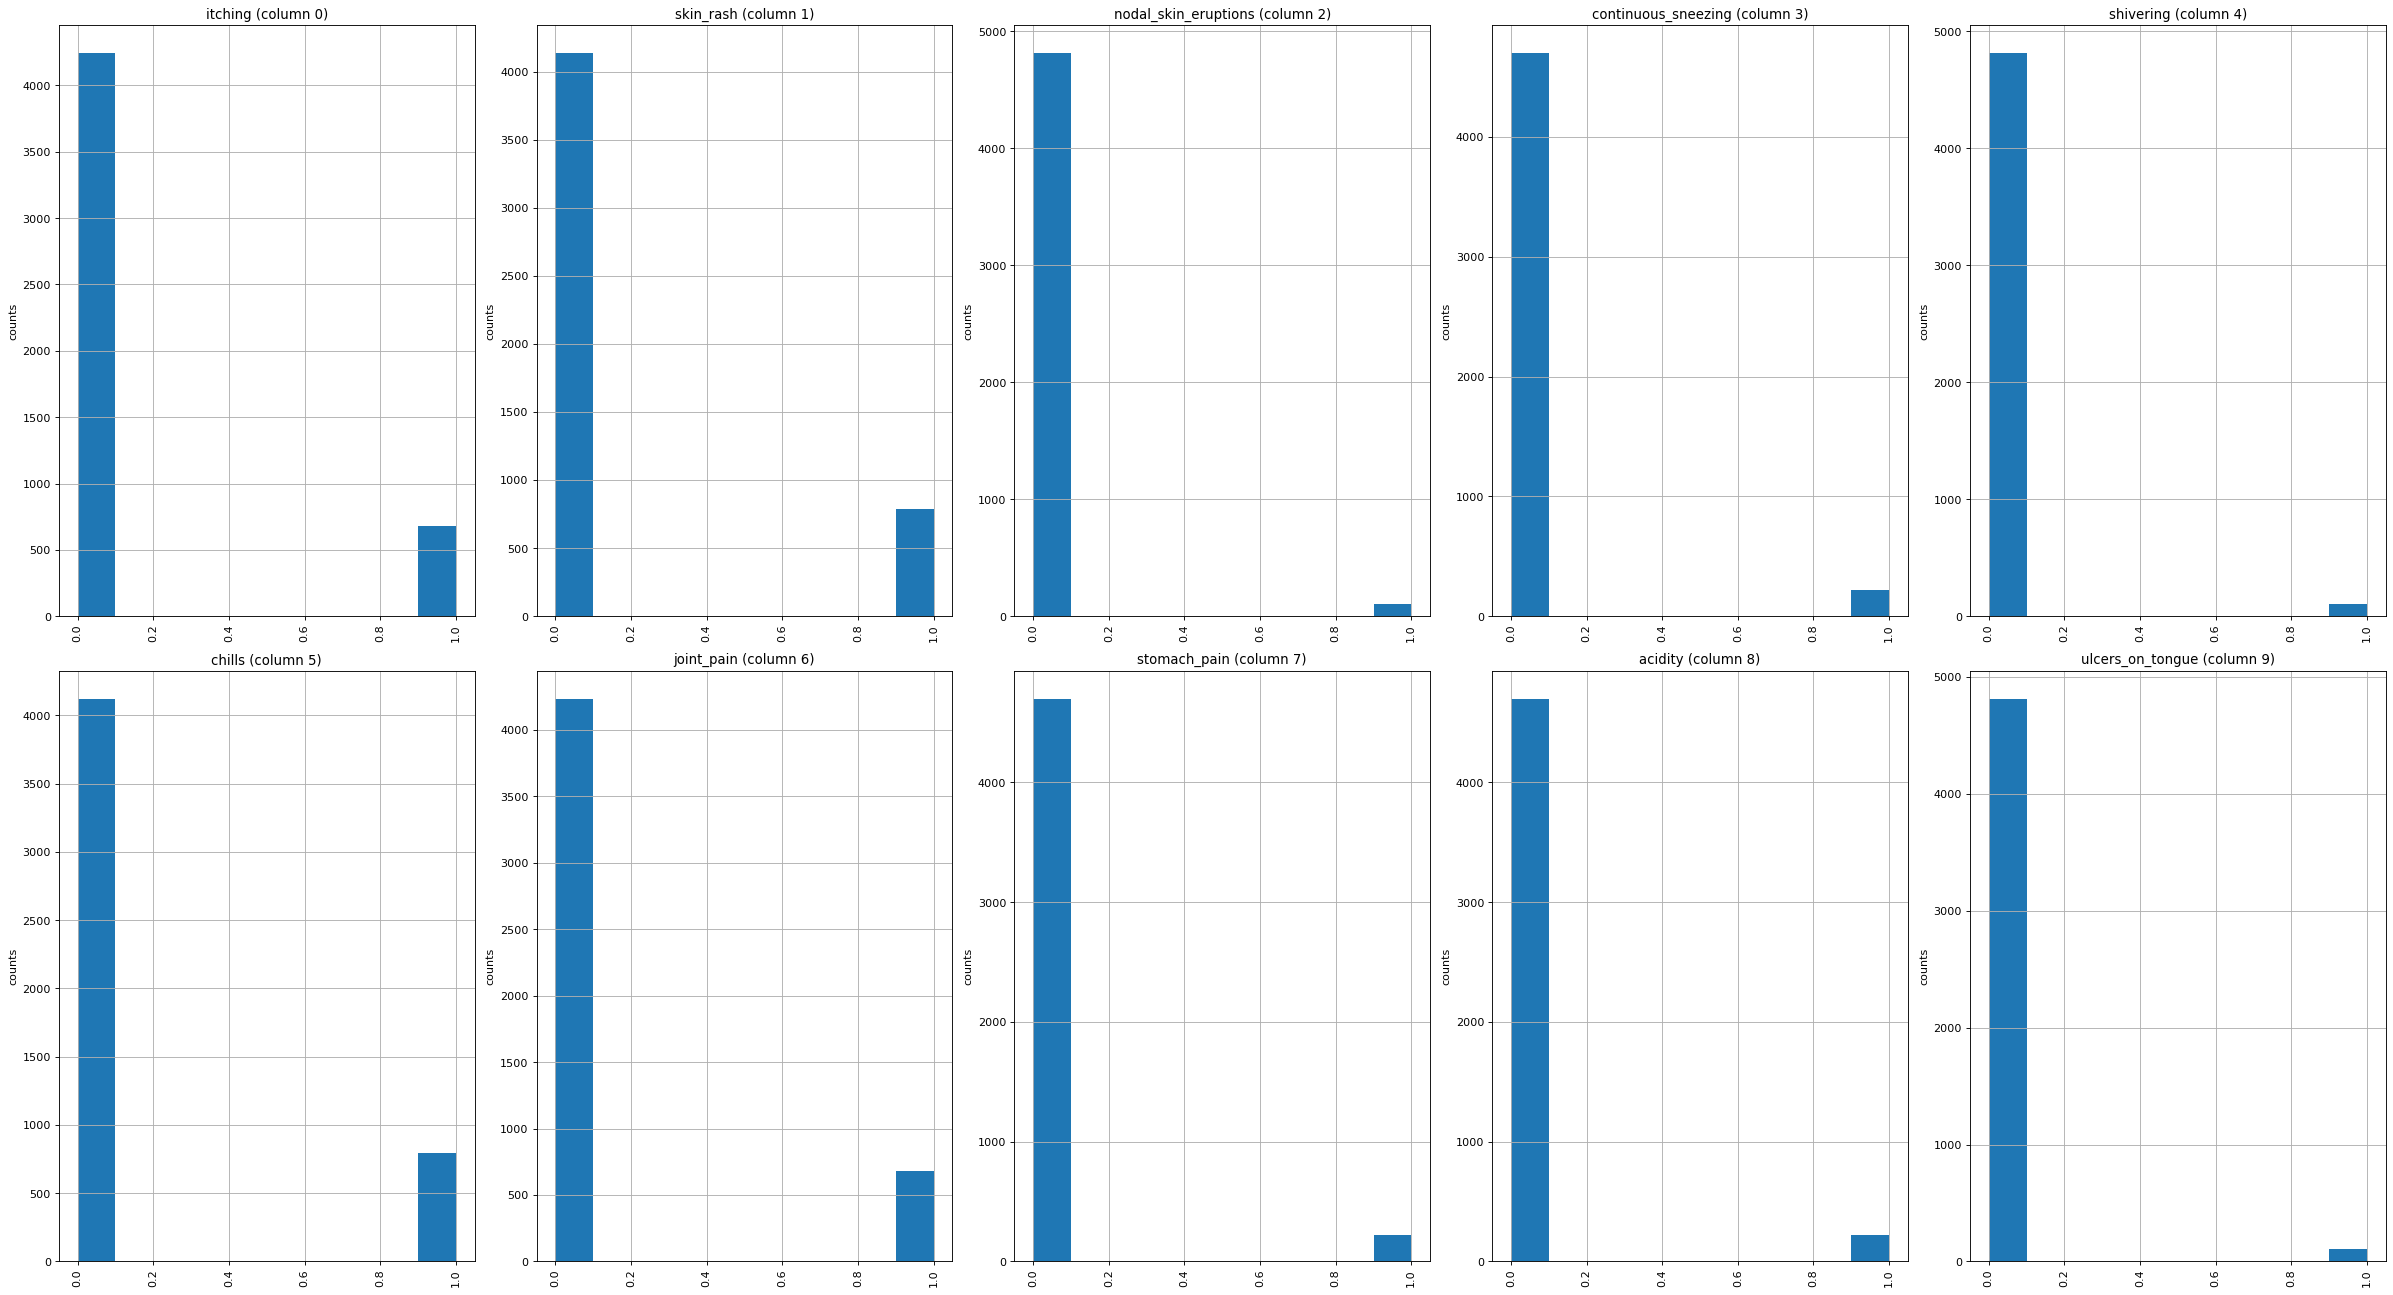

In [10]:
plotPerColumnDistribution(df,10, 5)

In [11]:
X= df[l1]
y = df[["prognosis"]]
np.ravel(y)
print(X)

      back_pain  constipation  abdominal_pain  diarrhoea  mild_fever  \
0             0             0               0          0           0   
1             0             0               0          0           0   
2             0             0               0          0           0   
3             0             0               0          0           0   
4             0             0               0          0           0   
...         ...           ...             ...        ...         ...   
4915          0             0               0          0           0   
4916          0             0               0          0           0   
4917          0             0               0          0           0   
4918          0             0               0          0           0   
4919          0             0               0          0           0   

      yellow_urine  yellowing_of_eyes  acute_liver_failure  fluid_overload  \
0                0                  0                    

In [12]:
tr=pd.read_csv("testing.csv")

#Using inbuilt function replace in pandas for replacing the values

tr.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}},inplace=True)
tr.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,2
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4


In [13]:
X_test= tr[l1]
y_test = tr[["prognosis"]]
np.ravel(y_test)
print(X_test)

    back_pain  constipation  abdominal_pain  diarrhoea  mild_fever  \
0           0             0               0          0           0   
1           0             0               0          0           0   
2           0             0               0          0           0   
3           0             0               1          0           0   
4           0             0               0          0           0   
5           0             0               1          0           0   
6           0             0               0          0           0   
7           0             0               0          0           0   
8           0             0               0          1           0   
9           0             0               0          0           0   
10          0             0               0          0           0   
11          0             0               0          0           0   
12          1             0               0          0           0   
13          0       

<ipython-input-8-52d45fc4c248>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


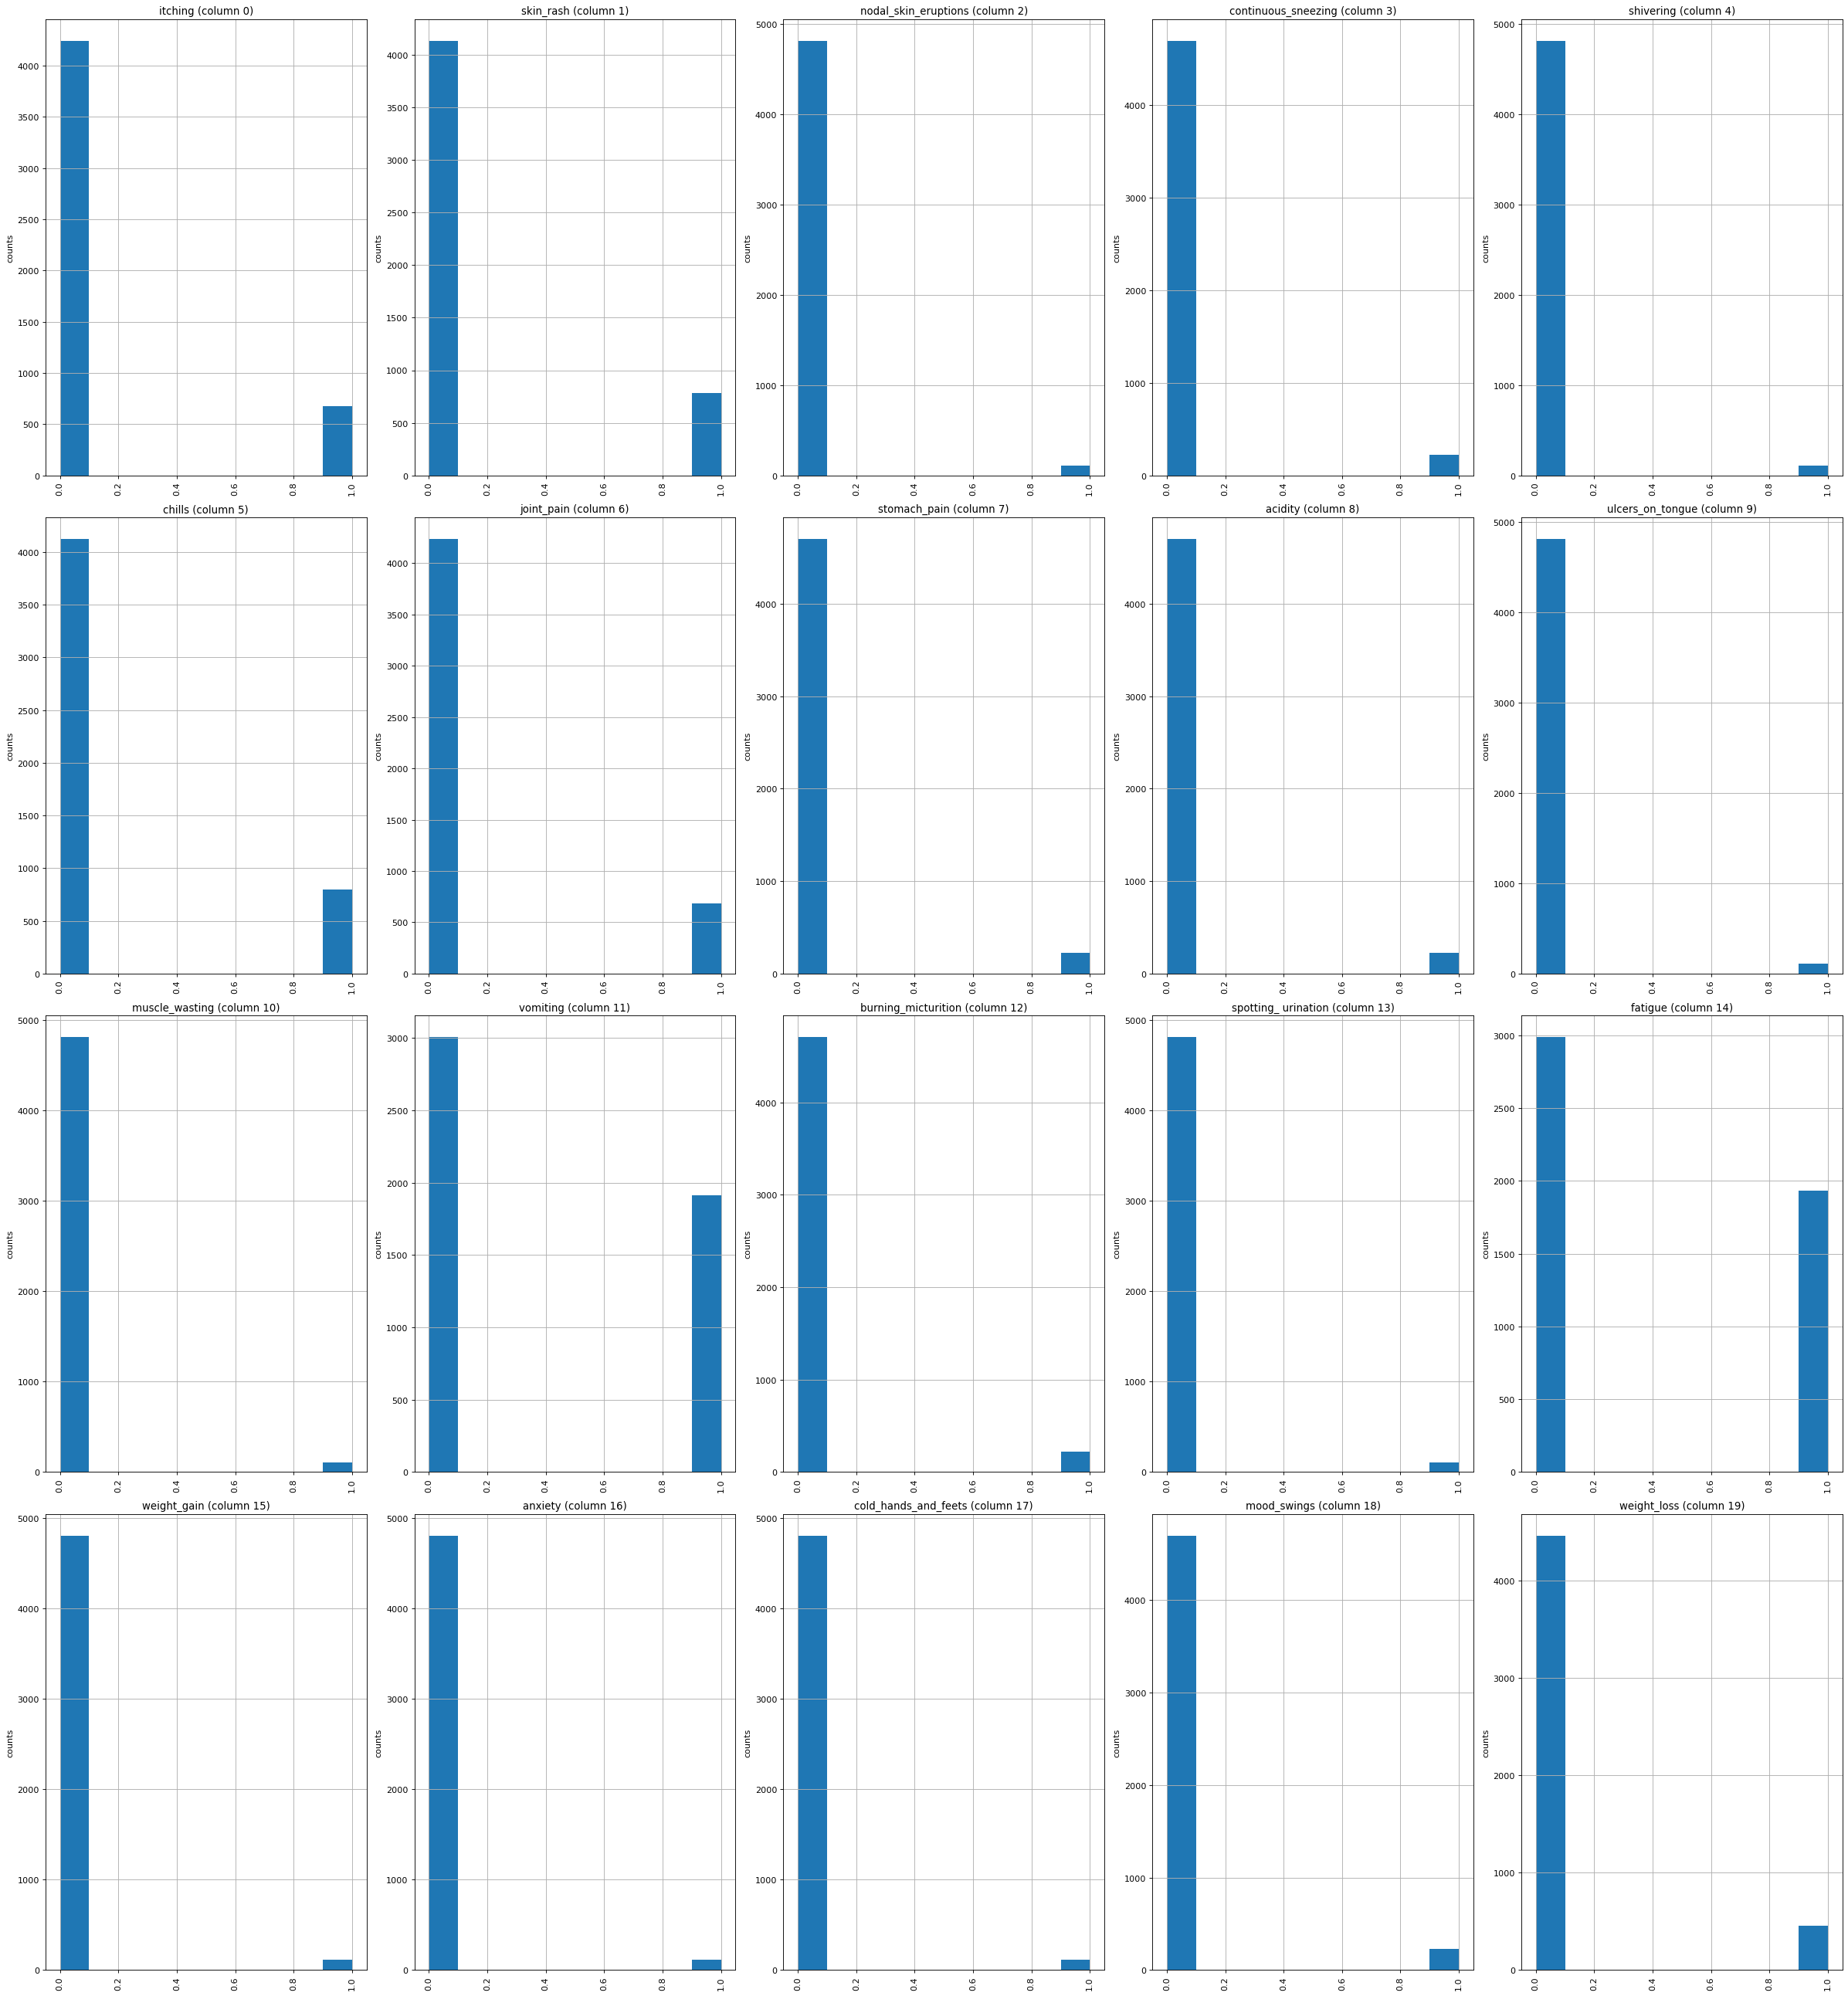

In [14]:
# plotPerColumnDistribution(tr, 10, 5)
plotPerColumnDistribution(tr,20, 5)

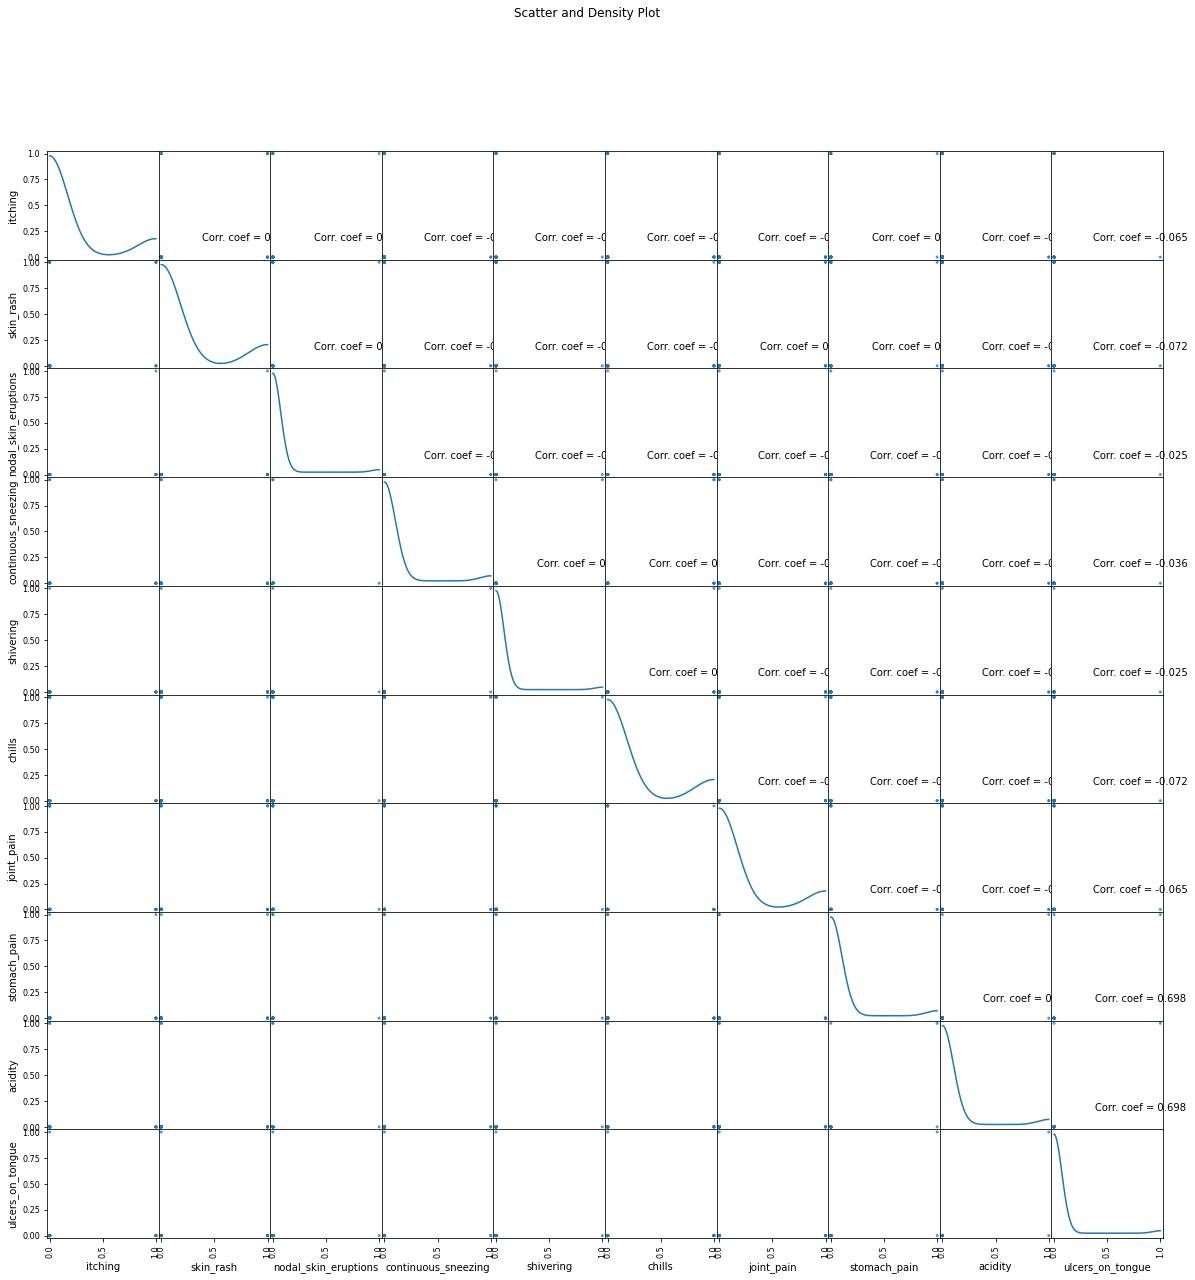

In [15]:
plotScatterMatrix(tr, 20, 10)

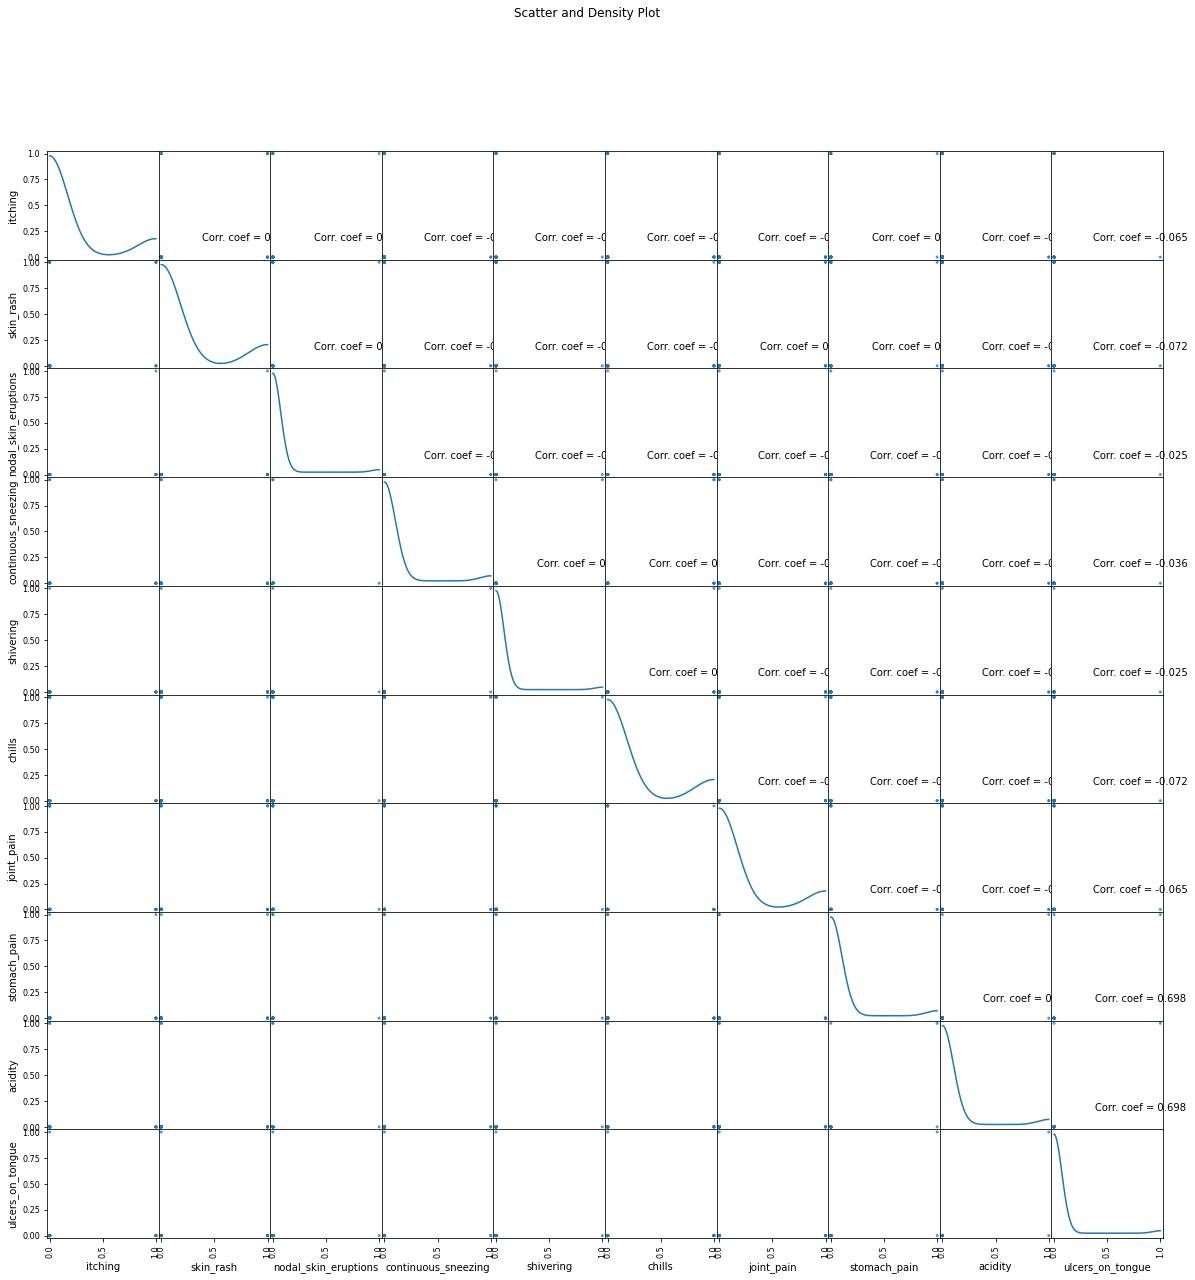

In [16]:
plotScatterMatrix(tr, 20, 10)

In [17]:
X_test= tr[l1]
y_test = tr[["prognosis"]]
np.ravel(y_test)
print(X_test)

    back_pain  constipation  abdominal_pain  diarrhoea  mild_fever  \
0           0             0               0          0           0   
1           0             0               0          0           0   
2           0             0               0          0           0   
3           0             0               1          0           0   
4           0             0               0          0           0   
5           0             0               1          0           0   
6           0             0               0          0           0   
7           0             0               0          0           0   
8           0             0               0          1           0   
9           0             0               0          0           0   
10          0             0               0          0           0   
11          0             0               0          0           0   
12          1             0               0          0           0   
13          0       

In [18]:
from sklearn import tree
clf3 = tree.DecisionTreeClassifier() 
clf3 = clf3.fit(X,y)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred=clf3.predict(X_test)
print("Decision Tree")
print("Accuracy")
#pickle.dump(clf3,open("DT.pkl","wb"))
print(accuracy_score(y_test, y_pred))
#print(accuracy_score(y_test, y_pred,normalize=False))


        

Decision Tree
Accuracy
0.9512195121951219


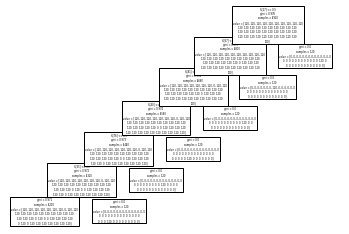

In [19]:
clff = tree.DecisionTreeClassifier(max_depth = 6, random_state = 0)
clff = clff.fit(X,y)
tree.plot_tree(clff);


In [20]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(n_estimators=100)
clf4 = clf4.fit(X,np.ravel(y))

# calculating accuracy 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred=clf4.predict(X_test)
print("Random Forest")
print("Accuracy")
#pickle.dump(clf4,open("RF.pkl","wb"))
print(accuracy_score(y_test, y_pred))


Random Forest
Accuracy
0.9512195121951219


In [21]:
from sklearn.utils.multiclass import unique_labels
def plot(y_true,y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}'for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),columns=column,index=indices)
    
    return table

In [24]:
plot(y_test,y_pred)

,Predicted0,Predicted1,Predicted2,Predicted3,Predicted4,Predicted5,Predicted6,Predicted7,Predicted8,Predicted9,...,Predicted31,Predicted32,Predicted33,Predicted34,Predicted35,Predicted36,Predicted37,Predicted38,Predicted39,Predicted40
Actual0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actual1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actual2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actual3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actual4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actual5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actual6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actual7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Actual8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Actual9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn=knn.fit(X,np.ravel(y))

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred=knn.predict(X_test)
print("kNearest Neighbour")
print("Accuracy")
print(accuracy_score(y_test, y_pred))
#pickle.dump(knn,open("KN.pkl","wb"))
#print(accuracy_score(y_test, y_pred,normalize=False))


kNearest Neighbour
Accuracy
0.9512195121951219


In [23]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb=gnb.fit(X,np.ravel(y))

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred=gnb.predict(X_test)
print("Naive Bayes")
print("Accuracy")
#pickle.dump(gnb,open("NB.pkl","wb"))
print(accuracy_score(y_test, y_pred))
#print(accuracy_score(y_test, y_pred,normalize=False))


Naive Bayes
Accuracy
0.9512195121951219


In [34]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X,np.ravel(y))
y_pred=gnb.predict(X_test)
print("Logistic Regression")
print("Accuracy")
pickle.dump(gnb,open("LR.pkl","wb"))
print(accuracy_score(y_test, y_pred))


Logistic Regression
Accuracy
0.9512195121951219
